<a href="https://colab.research.google.com/github/Al-Amin134/Artificial-Intelligence-Lab-4-1-/blob/main/Digit%20Classification/digit_classification_by_own_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#file upload section
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
#import section
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder

In [ ]:
#load section
data    = np.load("/content/my_dataset.npz")
X_train = data['x_train']
X_test = data['x_test']
y_train = data['y_train']
y_test = data['y_test']
print( X_train.shape) # jdi evabe na pay tagle data.get('x_train') eta use krb
print(X_test.shape)

In [ ]:
# normalize section
X_train = X_train.astype("float32")/255.0
X_test  = X_test.astype("float32")/255.0

In [ ]:
# Neural Network Section
inputs = Input((28,28))
x = Flatten()(inputs)
x1 = Dense(256, activation="relu")(x)
x2 = Dense(128,  activation="relu")(x1)
x3 = Dense(64,  activation="relu")(x2)
x4 = Dense(32,  activation="relu")(x3)
outputs = Dense(10, activation="softmax")(x4)
model = Model(inputs, outputs)


In [ ]:
#Compile Section
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
#model fitting
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_test, y_test)
)

In [ ]:
#predict the accuracy and validation loss
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print("Test Accuracy:", float(acc))

plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss Curves')
plt.legend()
plt.show()

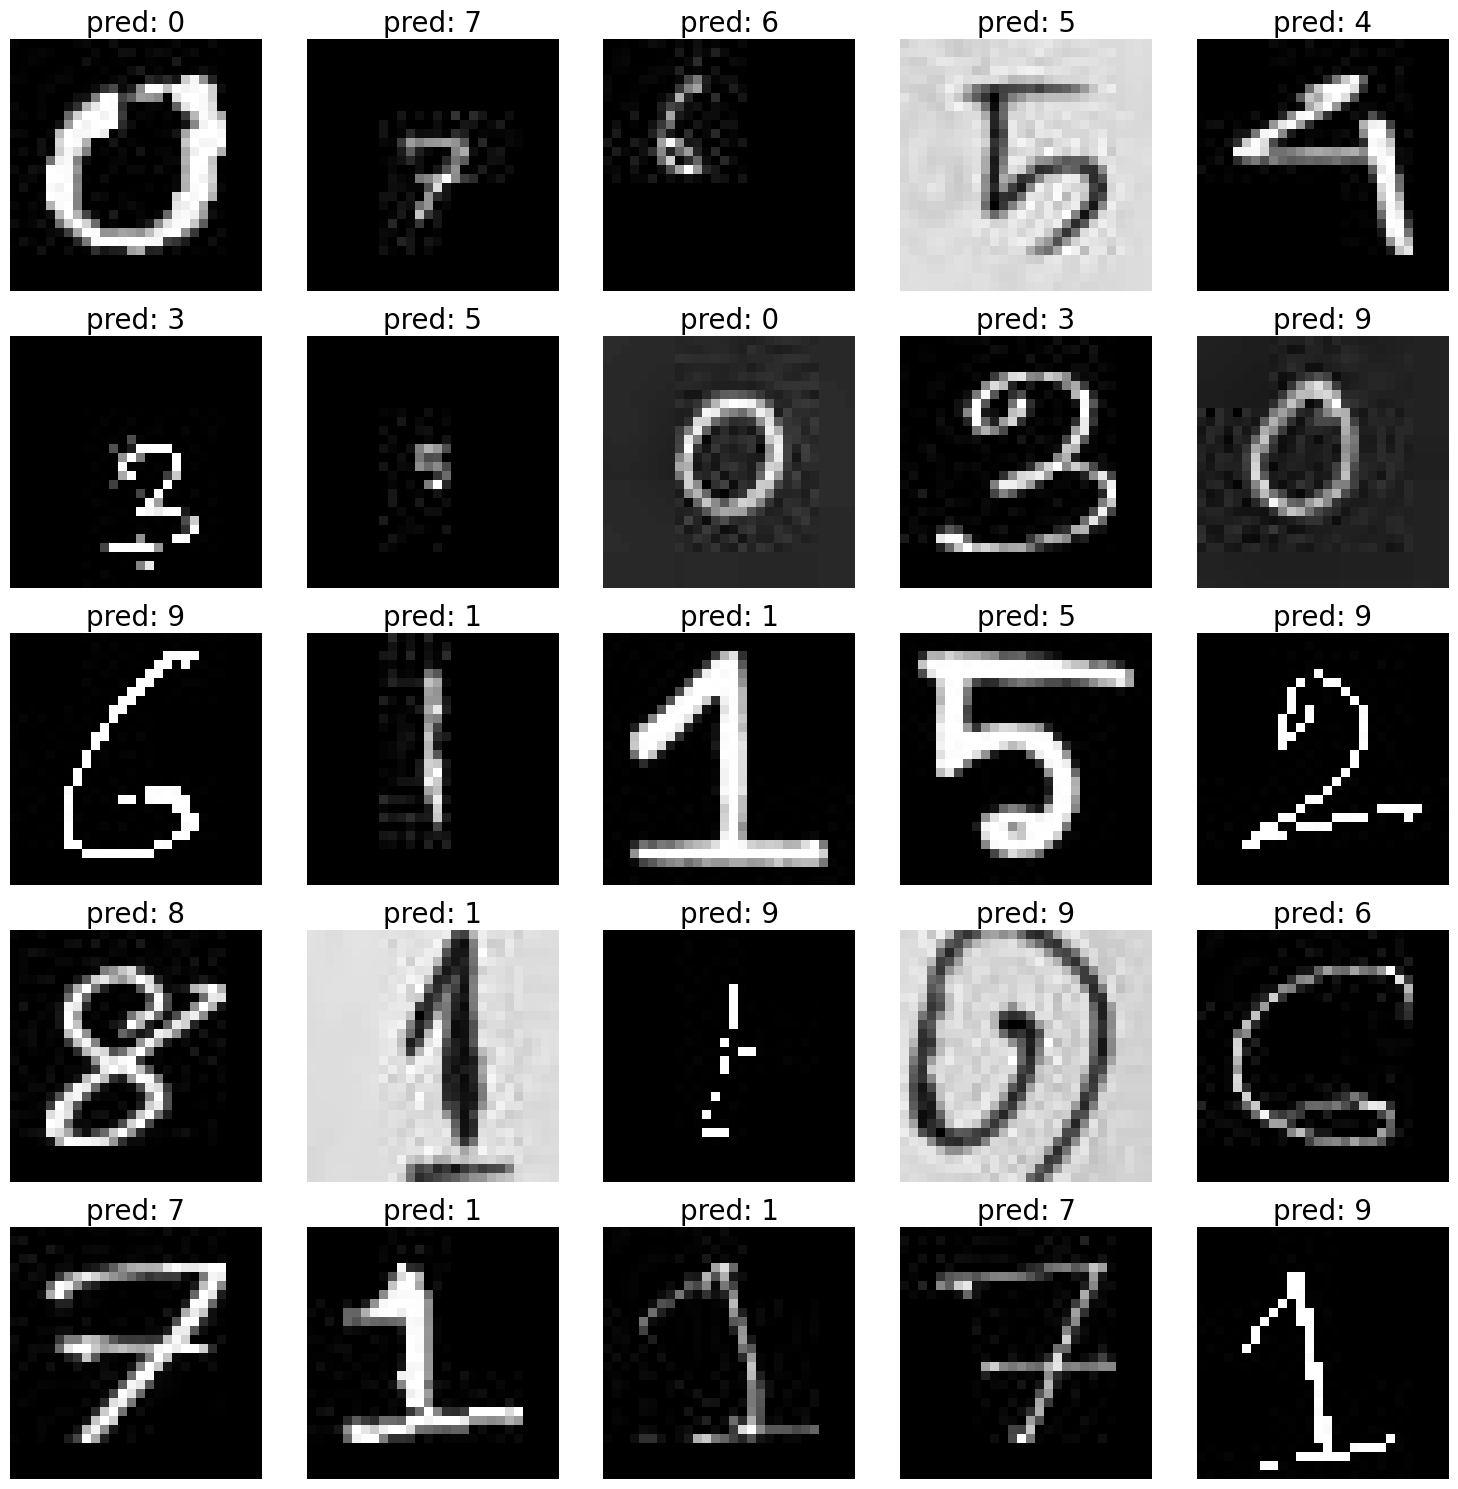

In [88]:
#predict and plot the image with label

plt.figure(figsize=(15,15))
n_show = min(25, len(X_test))

rows, cols = 5, 5

for i in range(n_show):
    plt.subplot(rows, cols, i+1)
    sample = X_test[i].reshape(1, 28, 28, 1)

    pred = model.predict(sample, verbose=0).argmax(axis=1)[0]
    plt.title(f"pred: {pred}", fontsize=20)

    plt.imshow(X_test[i], cmap="gray")
    plt.axis('off')

plt.tight_layout()
plt.show()
